In [47]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
df=pd.read_csv('iot231_combined.csv')


In [49]:
df.loc[(df.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PortScan'
df.loc[(df.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PortScan'
df.loc[(df.label == '-   Malicious   Okiru'), 'label'] = 'Okiru'
df.loc[(df.label == '(empty)   Malicious   Okiru'), 'label'] = 'Okiru'
df.loc[(df.label == '-   Benign   -'), 'label'] = 'Benign'
df.loc[(df.label == '(empty)   Benign   -'), 'label'] = 'Benign'
df.loc[(df.label == '-   Malicious   DDoS'), 'label'] = 'DDoS'
df.loc[(df.label == '-   Malicious   C&C'), 'label'] = 'C&C'
df.loc[(df.label == '(empty)   Malicious   C&C'), 'label'] = 'C&C'
df.loc[(df.label == '-   Malicious   Attack'), 'label'] = 'Attack'
df.loc[(df.label == '(empty)   Malicious   Attack'), 'label'] = 'Attack'
df.loc[(df.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df.loc[(df.label == '(empty)   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df.loc[(df.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'C&C-FileDownload'
df.loc[(df.label == '-   Malicious   C&C-Torii'), 'label'] = 'C&C-Torii'
df.loc[(df.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'C&C-HeartBeat-FileDownload'
df.loc[(df.label == '-   Malicious   FileDownload'), 'label'] = 'FileDownload'
df.loc[(df.label == '-   Malicious   C&C-Mirai'), 'label'] = 'C&C-Mirai'
df.loc[(df.label == '-   Malicious   Okiru-Attack'), 'label'] = 'Okiru-Attack'

In [50]:
df_removeunnamed = df.drop('Unnamed: 0', axis=1)


In [51]:
df_removeunnamed

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,service,duration,orig_bytes,resp_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,-,2.998796,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,-,2.998804,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.532526e+09,CMeH6R2aua5c5Dd65a,192.168.100.111,41762.0,221.182.209.127,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1444670,1.532526e+09,CvqGx33hsXDpDVXa1i,192.168.100.111,58758.0,208.50.139.48,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1444671,1.532526e+09,CC83RoUd9RLFuTL81,192.168.100.111,40400.0,40.95.136.51,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1444672,1.532526e+09,C4ISld2cuSukEEuQtk,192.168.100.111,27117.0,122.37.183.236,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
#df_removeunnamed.head(5000).to_csv("testwithoutlabel.csv")

In [53]:
addd=df_removeunnamed.copy()

In [54]:
addd

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,service,duration,orig_bytes,resp_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,-,2.998796,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,-,2.998804,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.532526e+09,CMeH6R2aua5c5Dd65a,192.168.100.111,41762.0,221.182.209.127,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1444670,1.532526e+09,CvqGx33hsXDpDVXa1i,192.168.100.111,58758.0,208.50.139.48,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1444671,1.532526e+09,CC83RoUd9RLFuTL81,192.168.100.111,40400.0,40.95.136.51,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1444672,1.532526e+09,C4ISld2cuSukEEuQtk,192.168.100.111,27117.0,122.37.183.236,23.0,-,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
lea = LabelEncoder()  
leb = LabelEncoder() 
lec = LabelEncoder() 
led = LabelEncoder() 
lee = LabelEncoder() 
lef = LabelEncoder() 
addd['uid']=lea.fit_transform(addd['uid'])
addd['id.orig_h']=leb.fit_transform(addd['id.orig_h'])
addd['id.resp_h']=lec.fit_transform(addd['id.resp_h'])
addd['label']=led.fit_transform(addd['label'])
#addd['conn_state']=lee.fit_transform(addd['conn_state'])
addd['history']=lef.fit_transform(addd['history'])


In [56]:
addd.dtypes

ts                   float64
uid                    int64
id.orig_h              int64
id.orig_p            float64
id.resp_h              int64
id.resp_p            float64
service               object
duration             float64
orig_bytes           float64
resp_bytes           float64
local_orig            object
local_resp            object
missed_bytes         float64
history                int64
orig_pkts            float64
orig_ip_bytes        float64
resp_pkts            float64
resp_ip_bytes        float64
label                  int64
proto_icmp             int64
proto_tcp              int64
proto_udp              int64
conn_state_OTH         int64
conn_state_REJ         int64
conn_state_RSTO        int64
conn_state_RSTOS0      int64
conn_state_RSTR        int64
conn_state_RSTRH       int64
conn_state_S0          int64
conn_state_S1          int64
conn_state_S2          int64
conn_state_S3          int64
conn_state_SF          int64
conn_state_SH          int64
conn_state_SHR

In [57]:
new= addd[['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
     'duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes',
       'resp_pkts', 'resp_ip_bytes', 'label', 'proto_tcp',
       'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH',
       'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3',
       'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

In [58]:
new.isnull().sum()


ts                        0
uid                       0
id.orig_h                 0
id.orig_p                 0
id.resp_h                 0
id.resp_p                 0
duration             399996
orig_bytes           399996
resp_bytes           399996
missed_bytes              0
history                   0
orig_pkts                 0
orig_ip_bytes             0
resp_pkts                 0
resp_ip_bytes             0
label                     0
proto_tcp                 0
proto_udp                 0
conn_state_OTH            0
conn_state_REJ            0
conn_state_RSTO           0
conn_state_RSTOS0         0
conn_state_RSTR           0
conn_state_RSTRH          0
conn_state_S0             0
conn_state_S1             0
conn_state_S2             0
conn_state_S3             0
conn_state_SF             0
conn_state_SH             0
conn_state_SHR            0
dtype: int64

In [61]:
adad=new.copy()

In [62]:
adad['duration'] =new['duration'].fillna(0)
adad['orig_bytes'] =new['orig_bytes'].fillna(0)
adad['resp_bytes'] =new['resp_bytes'].fillna(0)



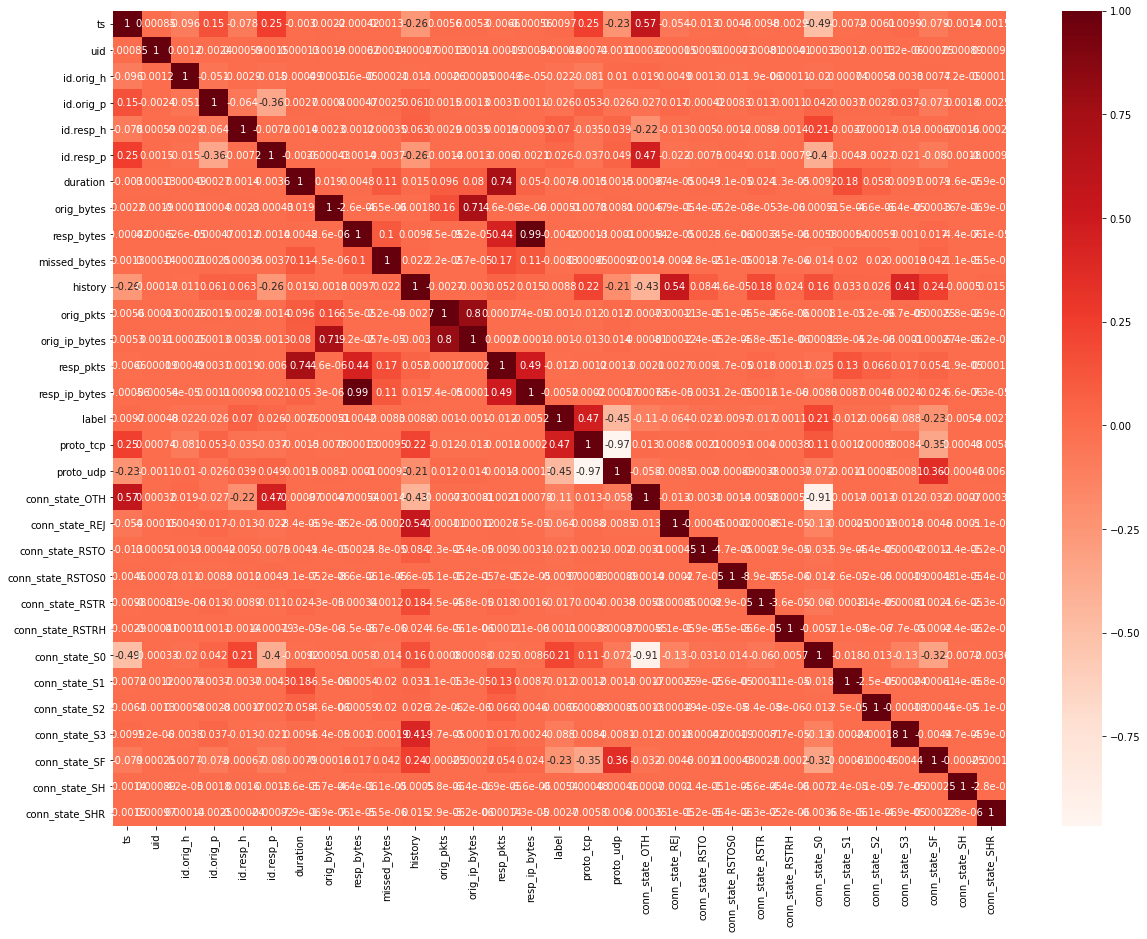

In [75]:
plt.figure(figsize=(20,15))
cor = adad.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
threshold = 0.8

def high_cor_function(adad):
    cor = adad.corr()
    corrm = np.corrcoef(adad.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [79]:
high_cor_function(adad)

max corr: 0.9928271400088159 , min corr:  -0.9663308778477753


resp_ip_bytes  resp_bytes    0.992827
orig_ip_bytes  orig_pkts     0.804117
dtype: float64

In [101]:
newq=adad[['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_ip_bytes', 'resp_ip_bytes',
       'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR',
       'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
       'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

In [102]:
newq.shape

(1444674, 21)

In [103]:
from sklearn.cluster import KMeans
from numpy import unique
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import Birch
from sklearn.decomposition import PCA

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f897229aee0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8972bf40d0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f897229aee0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f897229aee0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8972452ee0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8972452ee0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8972452ee0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8972452ee0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8972452ee0>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

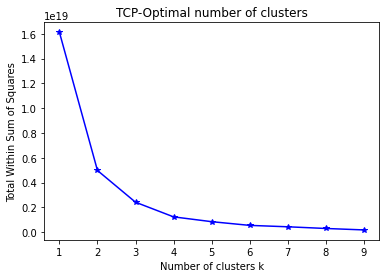

In [104]:

wss = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(newq)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("TCP-Optimal number of clusters")
    #plt.xlim(xmin=0)
plt.ticklabel_format(useOffset=False)



In [98]:
def kmeancluster(cluster):
    
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state=123)
    label = kmeans.fit_predict(newq)
    centers = np.array(kmeans.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    tcp_protocol1['cluster']= kmeans.labels_
    seedfsd1= tcp_protocol1[['label', 'cluster']]
    ax1 = plt.axes()
    
    sns.histplot(binwidth=0.5, x="label", hue="cluster", data=seedfsd1, stat="density", shrink=0.3, multiple="stack", common_norm=False)
    #sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
    ax1.set_title('Kmeans cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and labels, labels vs probability density plot')
    plt.xticks(rotation=90)
    
    plt.figure(figsize=(6,8))
    ax2=tcp_protocol1.groupby('cluster')['label'].value_counts().unstack().plot.bar()
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend(title="Clusters")
    ax2.set_ylabel("Count")
    ax2.set_title('Kmeans cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and labels, labels vs count plot')
    plt.gcf().set_size_inches(6, 5)
    return  tcp_protocol1


In [100]:
kmeancluster(3)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f8972603700>
Traceback (most recent call last):
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/achintya/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

NameError: name 'tcp_protocol1' is not defined

<Figure size 360x288 with 0 Axes>

In [66]:
X= adad.drop('label', axis=1)
Y= adad[['label']]

In [70]:
Y.shape

(1444674, 1)

In [68]:
df_norm = (X - X.mean()) / (X.max() - X.min())

In [69]:
model = ExtraTreesClassifier(max_depth=5, n_estimators=150)
model.fit(df_norm, Y)

<ipython-input-69-58a553f16ec3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df_norm, Y)


KeyboardInterrupt: 

In [35]:
feature_importances = pd.DataFrame({'Feature Importance': model.feature_importances_}, index=X.columns).\
            sort_values(by='Feature Importance', ascending=False)
feature_importances

,Feature Importance
id.resp_p,2.535564e-01
conn_state_OTH,1.945811e-01
conn_state_S0,1.373767e-01
proto_tcp,9.514500e-02
id.orig_p,7.567270e-02
ts,7.357259e-02
proto_udp,6.720440e-02
history,5.133263e-02
id.orig_h,2.019231e-02
conn_state_SF,1.313768e-02


In [ ]:
newd['orig_bytes'] = pd.to_numeric(newd['resp_bytes'],errors = 'coerce')
newd['duration'] = pd.to_numeric(newd['duration'],errors = 'coerce')
newd['resp_bytes'] = pd.to_numeric(newd['resp_bytes'],errors = 'coerce')
newd['service'] = pd.to_numeric(newd['service'],errors = 'coerce')


In [ ]:
dropped_columns_fulls= newd.drop(columns=['local_orig', 'local_resp', 'service'])


In [ ]:
dropped_columns_fulls

In [ ]:
tcp_protocold= dropped_columns_fulls.query('proto == 1')
Udp_protocold= dropped_columns_fulls.query('proto == 2')
ICMP_protocold= dropped_columns_fulls.query('proto == 0')


In [ ]:
uad1= Udp_protocold[['duration','id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'orig_pkts']]
uad2= Udp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_bytes', 'resp_bytes', 'missed_bytes']]
uad3= Udp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_bytes', 'resp_bytes', 'conn_state']]
uad4= Udp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_ip_bytes', 'resp_ip_bytes', 'missed_bytes']]
uad5= Udp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_ip_bytes', 'resp_ip_bytes']]
uad6= Udp_protocold[['duration','id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p']]
uad7= Udp_protocold[['duration','id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'history']]
uad8= Udp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_bytes', 'resp_bytes', 'conn_state']]

uad10= Udp_protocold[['ts','id.orig_h', 'id.orig_p', 'orig_ip_bytes', 'resp_ip_bytes', 'label']]

uad9= Udp_protocold[['uid','duration','id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'orig_bytes', 'resp_bytes']]

In [ ]:

%store uad1
%store uad2
%store uad3
%store uad4
%store uad5
%store uad6
%store uad7
%store uad9
%store uad10
%store dropped_columns_fulls

In [ ]:
ad1= tcp_protocold[['duration','id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'orig_pkts']]
ad2= tcp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_bytes', 'resp_bytes', 'missed_bytes']]
ad3= tcp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_bytes', 'resp_bytes', 'conn_state']]
ad4= tcp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_ip_bytes', 'resp_ip_bytes', 'missed_bytes']]
ad5= tcp_protocold[['duration','id.orig_h', 'id.orig_p', 'orig_ip_bytes', 'resp_ip_bytes']]

ad6= tcp_protocold[['duration','id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p']]
ad7= tcp_protocold[['duration','id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'history']]


ad8= tcp_protocold[['duration','missed_bytes', 'orig_ip_bytes', 'resp_ip_bytes', 'conn_state']]
ad9= tcp_protocold[['ts','id.orig_h', 'id.orig_p', 'orig_ip_bytes', 'resp_ip_bytes']]
ad10= tcp_protocold[['ts','duration', 'id.orig_h', 'id.orig_p', 'orig_ip_bytes', 'resp_ip_bytes', 'label']]


In [ ]:
#ad1= tcp_protocold[['id.orig_h', 'id.orig_p' ]]

In [ ]:

%store ad1
%store ad2
%store ad3
%store ad4
%store ad5
%store ad6
%store ad7
%store ad9
%store ad9
%store ad10

### Service, Local_orig, Local_resp all values are Zero

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(dropped_columns_fulls.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
dropped_columns_full= df_removeunnamed.drop(columns=['ts','local_orig', 'local_resp','history', 'id.orig_h', 'id.orig_p', 'id.resp_p', 'id.resp_h', 'missed_bytes', 'label'])


In [ ]:
%store dropped_columns_full

In [ ]:
dropped_columns_full2= df_removeunnamed.drop(columns=['local_orig', 'local_resp','history', 'id.orig_h', 'id.orig_p', 'id.resp_p', 'id.resp_h', 'missed_bytes'])


In [ ]:
%store dropped_columns_full2

In [ ]:
#updated_df = dropped_columns_full.dropna()
tcp_protocol= dropped_columns_full.query('proto == "tcp"')
Udp_protocol= dropped_columns_full.query('proto == "udp"')
ICMP_protocol= dropped_columns_full.query('proto == "icmp"')

In [ ]:
tcp_protocol1= dropped_columns_full2.query('proto == "tcp"')
Udp_protocol2= dropped_columns_full2.query('proto == "udp"')
ICMP_protocol3= dropped_columns_full2.query('proto == "icmp"')

In [ ]:
tcp_protocol1.to_csv('wholedata')

In [ ]:
%store tcp_protocol1

In [ ]:
%store ICMP_protocol3

In [ ]:
df_removeunnamed['label'].describe

In [ ]:
dfd = Udp_protocol.copy()
dfICMP = ICMP_protocol.copy()
dftcp = tcp_protocol.copy()

In [ ]:
#valuscount= dfd['label'].value_counts()

In [ ]:
def udp(dfd):
    dfd['service']= dfd['service'].replace('-', np.NaN)
    dfd['duration']= dfd['duration'].replace('-', np.NaN)
    dfd['orig_bytes']= dfd['orig_bytes'].replace('-', np.NaN)
    dfd['resp_bytes']= dfd['resp_bytes'].replace('-', np.NaN)
    
    return dfd

def ICMP(dfICMP):
    dfICMP['service']= dfICMP['service'].replace('-', np.NaN)
    dfICMP['duration']= dfICMP['duration'].replace('-', np.NaN)
    dfICMP['orig_bytes']= dfICMP['orig_bytes'].replace('-', np.NaN)
    dfICMP['resp_bytes']= dfICMP['resp_bytes'].replace('-', np.NaN)
    
    return dfICMP
def tcp(dftcp): 
    dftcp['service']= dftcp['service'].replace('-', np.NaN)
    dftcp['duration']= dftcp['duration'].replace('-', np.NaN)
    dftcp['orig_bytes']= dftcp['orig_bytes'].replace('-', np.NaN)
    dftcp['resp_bytes']= dftcp['resp_bytes'].replace('-', np.NaN)
    return dftcp
    

In [ ]:
Udp_test= udp(dfd)
ICMP_test= ICMP(dfICMP)
Tcp_test = tcp(dftcp)
#faaa= upd_return(dfICMP)

In [ ]:
Udp_test

In [ ]:
def udp_na_zero(Udp_test):
    Udp_test['orig_bytes'] =Udp_test['orig_bytes'].replace(np.nan, 0)
    Udp_test['resp_bytes'] = Udp_test['resp_bytes'].replace(np.nan, 0)
    Udp_test['duration'] = Udp_test['duration'].replace(np.nan, 0)
    Udp_test['service'] = Udp_test['service'].replace(np.nan, 0)
    return Udp_test
def ICMP_na_zero(ICMP_test):
    ICMP_test['orig_bytes'] =ICMP_test['orig_bytes'].replace(np.nan, 0)
    ICMP_test['resp_bytes'] = ICMP_test['resp_bytes'].replace(np.nan, 0)
    ICMP_test['duration'] = ICMP_test['duration'].replace(np.nan, 0)
    ICMP_test['service'] = ICMP_test['service'].replace(np.nan, 0)
    return ICMP_test
def ITCP_na_zero(Tcp_test):
    Tcp_test['orig_bytes'] = Tcp_test['orig_bytes'].replace(np.nan, 0)
    Tcp_test['resp_bytes'] = Tcp_test['resp_bytes'].replace(np.nan, 0)
    Tcp_test['duration'] = Tcp_test['duration'].replace(np.nan, 0)
    Tcp_test['service'] = Tcp_test['service'].replace(np.nan, 0)
    return Tcp_test

In [ ]:
Udp_test_na= udp_na_zero(Udp_test)
ICMP_test_na= ICMP_na_zero(ICMP_test)
TCP_test_na= ITCP_na_zero(Tcp_test)

In [ ]:

le1 = LabelEncoder()   
le2 = LabelEncoder() 
le3 = LabelEncoder() 
le4 = LabelEncoder() 
le5 = LabelEncoder() 
le6 = LabelEncoder() 
le7 = LabelEncoder() 
le8 = LabelEncoder() 
le9 = LabelEncoder() 
def labelenc(Udp_test_na):
    Udp_test_na['uid']=le1.fit_transform(Udp_test_na['uid'])
    Udp_test_na['proto']=le2.fit_transform(Udp_test_na['proto'])
    Udp_test_na['conn_state']=le3.fit_transform(Udp_test_na['conn_state'])
    return Udp_test_na

def icmplabelenc(ICMP_test_na):
    ICMP_test_na['uid']=le4.fit_transform(ICMP_test_na['uid'])
    ICMP_test_na['proto']=le5.fit_transform(ICMP_test_na['proto'])
    ICMP_test_na['conn_state']=le6.fit_transform(ICMP_test_na['conn_state'])
    return ICMP_test_na
def tcplabelenc(TCP_test_na):
    TCP_test_na['uid']=le7.fit_transform(TCP_test_na['uid'])
    TCP_test_na['proto']=le8.fit_transform(TCP_test_na['proto'])
    TCP_test_na['conn_state']=le9.fit_transform(TCP_test_na['conn_state'])
    return TCP_test_na

In [ ]:
udplabelencod=labelenc(Udp_test_na)
icmplabelencod= icmplabelenc(ICMP_test_na)
tcplabelencod= tcplabelenc(TCP_test_na)

In [ ]:
icmplabelencod

In [ ]:
udplabelencod.to_csv('adaa')

In [ ]:
ICMPdfselected= icmplabelencod[['duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'orig_pkts', 'resp_pkts']]
Udpdfselected= udplabelencod[['duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'orig_pkts', 'resp_pkts']]
Tcpdfselected= tcplabelencod[['duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'orig_pkts', 'resp_pkts']]


In [ ]:
def ICMPcopy(ICMPdfselected):
    CopyICMPdfselected=ICMPdfselected.copy()
    CopyICMPdfselected['orig_bytes'] = pd.to_numeric(CopyICMPdfselected['resp_bytes'],errors = 'coerce')
    CopyICMPdfselected['duration'] = pd.to_numeric(CopyICMPdfselected['duration'],errors = 'coerce')
    CopyICMPdfselected['resp_bytes'] = pd.to_numeric(CopyICMPdfselected['resp_bytes'],errors = 'coerce')

    return CopyICMPdfselected


def Udpcopy(Udpdfselected):
    CopyUDPdfselected=Udpdfselected.copy()
    CopyUDPdfselected['orig_bytes'] = pd.to_numeric(CopyUDPdfselected['resp_bytes'],errors = 'coerce')
    CopyUDPdfselected['duration'] = pd.to_numeric(CopyUDPdfselected['duration'],errors = 'coerce')
    CopyUDPdfselected['resp_bytes'] = pd.to_numeric(CopyUDPdfselected['resp_bytes'],errors = 'coerce')

    return CopyUDPdfselected
def tcpcopy(Tcpdfselected):
    CopyTCPdfselected=Tcpdfselected.copy()
    CopyTCPdfselected['orig_bytes'] = pd.to_numeric(CopyTCPdfselected['resp_bytes'],errors = 'coerce')
    CopyTCPdfselected['duration'] = pd.to_numeric(CopyTCPdfselected['duration'],errors = 'coerce')
    CopyTCPdfselected['resp_bytes'] = pd.to_numeric(CopyTCPdfselected['resp_bytes'],errors = 'coerce')

    return CopyTCPdfselected


In [ ]:
Udp_data= Udpcopy(Udpdfselected)
ICMP_data= ICMPcopy(ICMPdfselected)
TCP_data= tcpcopy(Tcpdfselected)

In [ ]:
Udp_data.isnull().sum()

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np


tcpcols = TCP_data.columns
ztcp = TCP_data.values #returns a numpy array
udpcols =Udp_data.columns
zudp = Udp_data.values
icmpcols=ICMP_data.columns
zicmp = ICMP_data.values
def tcpnorm(tcpcols, ztcp):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(ztcp)
    tcpnormalized = pd.DataFrame(x_scaled, columns = tcpcols )
    return tcpnormalized
def udpnorm(udpcols, zudp):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled1 = min_max_scaler.fit_transform(zudp)
    udpnormalized = pd.DataFrame(x_scaled1, columns = udpcols )
    return udpnormalized
def icmpnorm(icmpcols, zicmp):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled2 = min_max_scaler.fit_transform(zicmp)
    icmpnormalized = pd.DataFrame(x_scaled2, columns = icmpcols )
    return icmpnormalized


In [ ]:
tcp_norm= tcpnorm(tcpcols, ztcp)
udp_norm= udpnorm(udpcols, zudp)
icmp_norm= icmpnorm(icmpcols, zicmp)

In [ ]:
icmp_norm

In [ ]:
tcp_norm.to_csv('ad_tcp')

In [ ]:
tcp_norm

In [ ]:
udp_norm

In [ ]:
%store tcp_norm

%store udp_norm
%store icmp_norm
%store Udp_protocol2

In [ ]:
#x_tcpselected = tcp_norm.iloc[:, 0:-1]
tcpfeatures = tcp_norm.values
#x_udpselected = udp_norm.iloc[:, 0:-1]
udpfeatures = udp_norm.values
#x_icmpselected= icmp_norm.iloc[:, 0:-1]
icmpfeatures= ICMP_data.values

In [ ]:
%store tcpfeatures
%store udpfeatures

In [ ]:
tcp_norm.isnull().sum()

In [ ]:
udp_norm.iloc[:,[0,2]]


In [ ]:
import sklearn.cluster as cluster

K=range(1,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(udp_norm)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'Distorsion' : wss})
mycenters

In [ ]:
sns.lineplot(x = 'Clusters', y = 'Distorsion', data = mycenters)


In [ ]:
'''
import sklearn.metrics as metrics

for i in range(1,11):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(x).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(x, labels, metric="euclidean",sample_size=1000,random_state=200)))
    

'''


In [ ]:
#kmeans = cluster.KMeans(n_clusters=4 ,init="k-means++")
#kmeans = kmeans.fit(x)

In [ ]:
#x['Clusters'] = kmeans.labels_


In [ ]:
'''

def kmeancluster(cluster):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state=123)
    y_kmeans = kmeans.fit_predict(udp_norm)
    clusters = np.unique(y_kmeans)
    udp_norm['Cluster'] = y_kmeans
    reduction_pca = PCA(n_components=2)
    reduced_features = reduction_pca.fit_transform(udp_norm)
    
    return udp_norm

'''

In [ ]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#reduced_features = pca.fit_transform(udp_norm)
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(udp_norm)
def kmeancluster(cluster):
    
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state=123)
    label = kmeans.fit_predict(reduced_features)
    centers = np.array(kmeans.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    udp_norm['label'] = label
    ax = plt.axes()

    for i in uniq:
        plt.scatter(reduced_features[label == i , 0] , reduced_features[label == i , 1] , label = i)
    plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
    
    plt.xlabel([])
    ax.set_title('UDP-Kmeans + PCA algorithms plot cluster'+ "-"  + str(cluster))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
    
    return 

In [ ]:
kmeancluster(2)

In [ ]:
kmeancluster(3)

In [ ]:
kmeancluster(4)

In [ ]:
kmeancluster(5)

In [ ]:
kmeancluster(2)

In [ ]:
clusters

In [ ]:
kmeancluster(3)

In [ ]:
from sklearn.decomposition import PCA
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(udp_norm)

In [ ]:
reduced_features[:, 0]

In [ ]:
reduced_features[:, 1]

In [ ]:
udp_norm.to_csv('sss')

In [ ]:
g=sns.pairplot(data=udp_norm,hue='Cluster',diag_kind=None)
g.fig.suptitle("'Column-wise Clusters for TCP'", y=1.08)


In [ ]:
markersize = udp_norm['orig_bytes']
markercolor = udp_norm['city-mpg']
markershape = udp_norm['num-of-doors'].replace("four","square").replace("two","circle")


In [ ]:
fig1 = go.Scatter3d(x=udp_norm['orig_bytes'],
                    y=udp_norm['resp_bytes'],
                    z=udp_norm['conn_state'],
                    marker=dict(size=10,
                                color='LightSkyBlue',
                                opacity=0.9,
                                reversescale=True,
                                colorscale='Blues'),
                    line=dict (width=0.02),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="orig_bytes"),
                                yaxis=dict( title="resp_bytes"),
                                zaxis=dict(title="conn_state")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("6DPlot.html"))

In [ ]:
'''
plt.scatter(udp_norm[y_kmeans == 0]['duration'], udp_norm[y_kmeans == 0]['orig_bytes'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(udp_norm[y_kmeans == 1]['duration'], udp_norm[y_kmeans == 1]['orig_bytes'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(udp_norm[y_kmeans == 0]['resp_bytes'], udp_norm[y_kmeans == 0]['conn_state'], s = 20, c = 'pink')
plt.scatter(udp_norm[y_kmeans == 1]['resp_bytes'], udp_norm[y_kmeans == 1]['conn_state'], s = 20, c = 'yellow')
plt.scatter(udp_norm[y_kmeans == 0]['orig_pkts'], udp_norm[y_kmeans == 0]['resp_pkts'], s = 20, c = 'blue')
plt.scatter(udp_norm[y_kmeans == 1]['orig_pkts'], udp_norm[y_kmeans == 1]['resp_pkts'], s = 20, c = 'black')
#plt.scatter(scaled_X[y_kmeans == 2]['W0'], scaled_X[y_kmeans == 2]['W2'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'brown', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()


'''

In [ ]:
from sklearn.decomposition import PCA
titanic_pca = PCA(n_components=4)
titanic_pca.fit(tcpfeatures)
test = titanic_pca.transform(tcpfeatures)

plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [ ]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(tcpfeatures)

In [ ]:
reduced_features[:, 0]

In [ ]:
reduced_features[:, 1]

In [ ]:
import numpy
numpy.isnan(reduced_features).any()


In [ ]:
'''

cluster_distorsion = []
for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i, init="k-means++", max_iter = 300)
    test_sklearn.fit(reduced_features)
    cluster_distorsion.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(cluster_distorsion, marker='o', label='Distorsion for some number of clusters')
plt.title("Distorsion between clusters")
plt.xlabel('Number of clusters')
plt.ylabel("Distorsion")
plt.legend()
plt.show()

'''


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='k-means++', random_state=123)
clusters = km.fit(reduced_features)

In [ ]:
#reduced_features[:, 1]

In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("TCP KMeans")
plt.legend()
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 2, init='k-means++', max_iter=300, 
                        tol=0.0001,))
algorithm.fit(reduced_features)
tcp_protocol1['clusterlabel']= algorithm.labels_


In [ ]:
tcp_protocol1

In [ ]:
seedfsd= tcp_protocol1[['label', 'clusterlabel']]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes()
sns.histplot(binwidth=0.6, x="label", hue="label", data=dfsd, stat = 'count', shrink=.9, common_norm=False)
ax.set_title('TCP protocol labels count')
plt.xticks(rotation=45)



In [ ]:

ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=dfsd, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)


In [ ]:
from sklearn.cluster import DBSCAN


In [ ]:
db = DBSCAN(eps=0.5, min_samples=10).fit(udp_norm)
labels = db.labels_

## Working on next time

In [ ]:
# %load kmeans_numpy.py
import numpy as np
import random

class KMeans_numpy(object):
    #INPUT: n_clusters - number of clusters that algortihm will try to find
    #       tolerance -  number when difference between prev cluster and new cluster is less then this number we will stop algo
    #       max_iter - how many times cetroids will move
    def __init__(self, n_clusters=4, tolerance = 0.001, max_iter = 300):
        self.k_clusters = n_clusters
        self.tol = tolerance
        self.max_iter = max_iter
    
    #TRAIN/FIT function, used to find the best positions for our clusters
    #
    #INPUT: X - fetures of dataset in which we are trying to find clusters
    def fit(self, X):
        #Starting clusters will be random members from X set
        self.centroids = []
        
        for i in range(self.k_clusters):
            #this index is used to acces random element from input set
            index = random.randint(1, len(X)-1)
            self.centroids.append(X[index])
        
        for i in range(self.max_iter):  
            #storing previous values of centroids
            prev_centroids = self.centroids
            #This will be dict for ploting data later on
            #with it we can find data points which are in the some cluster
            self.clustered_data = {}
            #Centroids values for this iteration
            cen_temp = []
            
            for centroid in range(len(self.centroids)):
                #creating empty list of elements for current cluster/centroid
                list_of_closer_samples = []
                
                for k in range(len(X)):
                    helper_list = []
                    for j in range(self.k_clusters):
                        #caluclating euclidian distance between current X value and all centroids in our list
                        helper_list.append(self.euclidian_distance(self.centroids[j], X[k]))
                    
                    #if minimal distance between curent value and centroid that we are currently interested in
                    #store value to the list of examples for that centroid
                    if np.argmin(helper_list) == centroid:
                        list_of_closer_samples.append(X[k])   
                
                #New position of each cluster is calculated by mean of all examples closest to it
                cen_temp.append(np.average(list_of_closer_samples, axis=0))
                
                self.clustered_data[centroid] = list_of_closer_samples

            #check if it is optimized
            optimized = True
            for c in range(len(self.centroids)):
                original_centroid = prev_centroids[c]
                current_centroid = cen_temp[c]
                #checking if % of change between old position and new position is less then tolerance (0.001 by default)
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    self.centroids = cen_temp
                    
            if optimized:
                break
        #return final clusters values [optional, it is only used for graph]
        c = self.centroids
        return c, self.clustered_data
    
    #euclidian distance between points
    def euclidian_distance(self, centroid, x_current):
        return np.sqrt(np.sum(np.power((centroid - x_current), 2)))
    
    #INPUT: X_test set - set of data to test our clusters on
    def predict(self, Xtest):
        pred = []
        for i in range(len(Xtest)):
            help_list = []
            for j in range(len(self.centroids)):
                help_list.append(self.euclidian_distance(self.centroids[j], Xtest[i]))
            pred.append(np.argmin(help_list))
        return pred



In [ ]:
from kmeans_numpy import *

kmm = KMeans_numpy(n_clusters=4, tolerance=0.00001)

In [ ]:
clusters, clustered_data = kmm.fit(reduced_features)


In [ ]:
clustered_data

In [ ]:
clusters

In [ ]:
clusters = np.array(clusters)


In [ ]:
clusters.shape

In [ ]:
cluster_one_data = np.array(clustered_data[0])
cluster_two_data = np.array(clustered_data[1])
# cluster_three_data = np.array(clustered_data[2])
# cluster_four_data = np.array(clustered_data[3])

In [ ]:
cluster_two_data

In [ ]:
cluster_one_data

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
#plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
#plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
# plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("ICMP KMeans results")
plt.legend()
plt.show()

In [ ]:
import time

plot_colors = ['red', 'green', 'blue', 'orange', 'yellow']
start = time.time()
for i in range(1, 5):
    test = KMeans_numpy(n_clusters=i, tolerance=0.00001)
    clust, clust_data = test.fit(reduced_features)
    clust = np.array(clust)
    plt.figure(figsize=(12, 6))
    for key in clust_data.keys():
        plt.scatter(np.array(clust_data[key])[:, 0], np.array(clust_data[key])[:, 1], color=plot_colors[key], label='Cluster {}'.format(key+1))
    
    plt.scatter(clust[:, 0], clust[:, 1], marker='*', s=200, color='black', label='Centroids')
    plt.title("Custom KMeans results")
    plt.legend()
    plt.show()
    
end = time.time()
print("This experiment took: {} seconds with custom algorithm".format(end-start))

In [ ]:
algorithm = (KMeans(n_clusters = 2, init='k-means++', max_iter=300, 
                        tol=0.0001,))
algorithm.fit(x_udpselected)
Udp_protocol2['clusterlabel']= algorithm.labels_


In [ ]:
Udp_protocol2.to_csv('ad')

In [ ]:
#facet = sns.lmplot(data=tcplabelencod, x='resp_ip_bytes', y='clusterlabel', hue='label', 
 #                  fit_reg=False, legend=True, legend_out=True)

In [ ]:
dfsd= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
dfsd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes()
sns.histplot(binwidth=0.05, x="label", hue="label", data=dfsd, stat = 'count', shrink=0.3, common_norm=False)
ax.set_title('UDP protocol labels count')


In [ ]:
sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=dfsd, stat="count", shrink=0.2, multiple="stack",common_norm=False)


In [ ]:

x,y = 'label', 'clusterlabel'


(dfsd
.groupby(label)[clusterlabel]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))



In [ ]:
counts = dfsd.reset_index().melt('index')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

#dfd.groupby(['label','clusterlabel']).size().unstack().plot(kind='bar',stacked=True)
Udp_protocol2.groupby(['label', 'clusterlabel']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()
plt.show()

In [ ]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [ ]:
df['Cluster'] = dfselected['Private'].apply(converter)


In [ ]:
clust, clust_data = inspect_kmeans.fit(features)


In [ ]:

from sklearn.cluster import KMeans

X1 = dfselected.iloc[:, 1:-1].values

inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
titanic_pca = PCA(n_components=4)
titanic_pca.fit(X1)
test = titanic_pca.transform(X1)

In [ ]:
plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [ ]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(X1)

In [ ]:
reduced_features 

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
clusters = km.fit(reduced_features)

In [ ]:
X1[:, 3]

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [ ]:
dfddropped_columns_full= dfab.drop(columns=['proto', 'service', 'ts', 'uid'])


In [ ]:
from yellowbrick.features import Rank2D

# Modify the figure size
fig, ax=plt.subplots(figsize=(14,7))

# Instantiate the Rank2D object with default arguments: visualizer
visualizer = Rank2D(algorithm="pearson")

# fit the visualizer
visualizer.fit_transform(dfddropped_columns_full)

# Plot the visualizer with .poof() method
visualizer.poof()

In [ ]:
dfselected= dfab[['service','duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'orig_pkts', 'resp_pkts']]


In [ ]:
X1 = dfselected.iloc[:, 1:-1].values

inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
km = KMeans(n_clusters=3)
clusters = km.fit(X1)

In [ ]:
clusters


In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [ ]:
features = dfselected.iloc[:, 1:-1].values


In [ ]:
features.shape

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
titanic_pca = PCA(n_components=4)
titanic_pca.fit(features)
test = titanic_pca.transform(features)

In [ ]:
plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [ ]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

In [ ]:
reduced_features.shape

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit(reduced_features)

In [ ]:
clusters


In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [ ]:
reduced_features.shape


In [ ]:
import numpy as np
from kmeans_numpy import *


In [ ]:
kmm = KMeans_numpy(n_clusters=5, tolerance=0.00001)


In [ ]:
clusters, clustered_data = kmm.fit(reduced_features)


In [ ]:
clusters = np.array(clusters)


In [ ]:
clusters.shape

In [ ]:
cluster_one_data = np.array(clustered_data[0])
cluster_two_data = np.array(clustered_data[1])
cluster_three_data = np.array(clustered_data[2])
cluster_four_data = np.array(clustered_data[3])
cluster_five_data = np.array(clustered_data[4])

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

In [ ]:
# %load kmeans_numpy.py
import numpy as np
import random

class KMeans_numpy(object):
    #INPUT: n_clusters - number of clusters that algortihm will try to find
    #       tolerance -  number when difference between prev cluster and new cluster is less then this number we will stop algo
    #       max_iter - how many times cetroids will move
    def __init__(self, n_clusters=2, tolerance = 0.001, max_iter = 300):
        self.k_clusters = n_clusters
        self.tol = tolerance
        self.max_iter = max_iter
    
    #TRAIN/FIT function, used to find the best positions for our clusters
    #
    #INPUT: X - fetures of dataset in which we are trying to find clusters
    def fit(self, X):
        #Starting clusters will be random members from X set
        self.centroids = []
        
        for i in range(self.k_clusters):
            #this index is used to acces random element from input set
            index = random.randint(1, len(X)-1)
            self.centroids.append(X[index])
        
        for i in range(self.max_iter):  
            #storing previous values of centroids
            prev_centroids = self.centroids
            #This will be dict for ploting data later on
            #with it we can find data points which are in the some cluster
            self.clustered_data = {}
            #Centroids values for this iteration
            cen_temp = []
            
            for centroid in range(len(self.centroids)):
                #creating empty list of elements for current cluster/centroid
                list_of_closer_samples = []
                
                for k in range(len(X)):
                    helper_list = []
                    for j in range(self.k_clusters):
                        #caluclating euclidian distance between current X value and all centroids in our list
                        helper_list.append(self.euclidian_distance(self.centroids[j], X[k]))
                    
                    #if minimal distance between curent value and centroid that we are currently interested in
                    #store value to the list of examples for that centroid
                    if np.argmin(helper_list) == centroid:
                        list_of_closer_samples.append(X[k])   
                
                #New position of each cluster is calculated by mean of all examples closest to it
                cen_temp.append(np.average(list_of_closer_samples, axis=0))
                
                self.clustered_data[centroid] = list_of_closer_samples

            #check if it is optimized
            optimized = True
            for c in range(len(self.centroids)):
                original_centroid = prev_centroids[c]
                current_centroid = cen_temp[c]
                #checking if % of change between old position and new position is less then tolerance (0.001 by default)
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    self.centroids = cen_temp
                    
            if optimized:
                break
        #return final clusters values [optional, it is only used for graph]
        c = self.centroids
        return c, self.clustered_data
    
    #euclidian distance between points
    def euclidian_distance(self, centroid, x_current):
        return np.sqrt(np.sum(np.power((centroid - x_current), 2)))
    
    #INPUT: X_test set - set of data to test our clusters on
    def predict(self, Xtest):
        pred = []
        for i in range(len(Xtest)):
            help_list = []
            for j in range(len(self.centroids)):
                help_list.append(self.euclidian_distance(self.centroids[j], Xtest[i]))
            pred.append(np.argmin(help_list))
        return pred



# leave below cell

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(dfselected)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [ ]:

km3 = KMeans(n_clusters=2).fit(dfselected)

dfd['Labels'] = km3.labels_


In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot( dfselected['resp_pkts'], dfselected['conn_state'], hue=dfselected['Labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 3 Clusters')
plt.show()

In [ ]:
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(dfd['proto'], dfd['orig_bytes'], hue=dfd['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [ ]:
features = dfd.iloc[:, 1:-1]


In [ ]:
features

In [ ]:
features[:, 0]

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
titanic_pca = PCA(n_components=4)
titanic_pca.fit(features)
test = titanic_pca.transform(features)

In [ ]:
plt.plot(list(titanic_pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [ ]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(features)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
clusters = km.fit(reduced_features)

In [ ]:
print(clusters)

In [ ]:
reduced_features[:, 1]

In [ ]:
reduced_features[:, 0]

In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [ ]:
# %load kmeans_numpy.py
import numpy as np
import random

class KMeans_numpy(object):
    #INPUT: n_clusters - number of clusters that algortihm will try to find
    #       tolerance -  number when difference between prev cluster and new cluster is less then this number we will stop algo
    #       max_iter - how many times cetroids will move
    def __init__(self, n_clusters=2, tolerance = 0.001, max_iter = 300):
        self.k_clusters = n_clusters
        self.tol = tolerance
        self.max_iter = max_iter
    
    #TRAIN/FIT function, used to find the best positions for our clusters
    #
    #INPUT: X - fetures of dataset in which we are trying to find clusters
    def fit(self, X):
        #Starting clusters will be random members from X set
        self.centroids = []
        
        for i in range(self.k_clusters):
            #this index is used to acces random element from input set
            index = random.randint(1, len(X)-1)
            self.centroids.append(X[index])
        
        for i in range(self.max_iter):  
            #storing previous values of centroids
            prev_centroids = self.centroids
            #This will be dict for ploting data later on
            #with it we can find data points which are in the some cluster
            self.clustered_data = {}
            #Centroids values for this iteration
            cen_temp = []
            
            for centroid in range(len(self.centroids)):
                #creating empty list of elements for current cluster/centroid
                list_of_closer_samples = []
                
                for k in range(len(X)):
                    helper_list = []
                    for j in range(self.k_clusters):
                        #caluclating euclidian distance between current X value and all centroids in our list
                        helper_list.append(self.euclidian_distance(self.centroids[j], X[k]))
                    
                    #if minimal distance between curent value and centroid that we are currently interested in
                    #store value to the list of examples for that centroid
                    if np.argmin(helper_list) == centroid:
                        list_of_closer_samples.append(X[k])   
                
                #New position of each cluster is calculated by mean of all examples closest to it
                cen_temp.append(np.average(list_of_closer_samples, axis=0))
                
                self.clustered_data[centroid] = list_of_closer_samples

            #check if it is optimized
            optimized = True
            for c in range(len(self.centroids)):
                original_centroid = prev_centroids[c]
                current_centroid = cen_temp[c]
                #checking if % of change between old position and new position is less then tolerance (0.001 by default)
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    self.centroids = cen_temp
                    
            if optimized:
                break
        #return final clusters values [optional, it is only used for graph]
        c = self.centroids
        return c, self.clustered_data
    
    #euclidian distance between points
    def euclidian_distance(self, centroid, x_current):
        return np.sqrt(np.sum(np.power((centroid - x_current), 2)))
    
    #INPUT: X_test set - set of data to test our clusters on
    def predict(self, Xtest):
        pred = []
        for i in range(len(Xtest)):
            help_list = []
            for j in range(len(self.centroids)):
                help_list.append(self.euclidian_distance(self.centroids[j], Xtest[i]))
            pred.append(np.argmin(help_list))
        return pred



In [ ]:
import numpy as np
from kmeans_numpy import *


In [ ]:
kmm = KMeans_numpy(n_clusters=5, tolerance=0.00001)


In [ ]:
clusters, clustered_data = kmm.fit(reduced_features)


In [ ]:
clusters = np.array(clusters)


In [ ]:
cluster_one_data = np.array(clustered_data[0])
cluster_two_data = np.array(clustered_data[1])
cluster_three_data = np.array(clustered_data[2])
cluster_four_data = np.array(clustered_data[3])
cluster_five_data = np.array(clustered_data[4])

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
len(Udp_protocol)

In [ ]:
dfa=dropped_columns_full.iloc[0:40000]


In [ ]:
from pycaret.clustering import *
clustering= setup(dfd, normalize=True, pca = True,silent =True,
            remove_multicollinearity= True )

In [ ]:
kmeans=create_model('kmeans')

In [ ]:
0.763*100


In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(dbscan, plot = 'elbow')


In [ ]:
plot_model(dbscan, plot = 'silhouette')


In [ ]:
evaluate_model(dbscan)



In [ ]:
tcp_protocol= df_removeunnamed.query('proto == "tcp"')
Udp_protocol= df_removeunnamed.query('proto == "udp"')
ICMP_protocol= df_removeunnamed.query('proto == "icmp"')

In [ ]:
dropped_columns_tcp= tcp_protocol.drop(columns=['local_orig', 'local_resp','history', 'id.orig_h', 'id.orig_p', 'id.resp_p', 'id.resp_h','label', 'missed_bytes'])


In [ ]:
dropped_columns_Udp= Udp_protocol.drop(columns=['local_orig', 'local_resp','history', 'id.orig_h', 'label','id.orig_p', 'id.resp_p', 'id.resp_h', 'missed_bytes'])


In [ ]:
dropped_columns_Udp

In [ ]:
dropped_columns_Udp.isnull().sum()


In [ ]:
dropped_columns_ICMP= ICMP_protocol.drop(columns=['local_orig', 'local_resp','history', 'id.orig_h', 'id.orig_p', 'id.resp_p', 'id.resp_h','label', 'missed_bytes'])


In [ ]:
dropped_columns_tcp.shape

In [ ]:
dropped_columns_Udp.columns

In [ ]:
dropped_columns_Udp.shape

In [ ]:
dropped_columns_Udp.dtypes

In [ ]:


#encoder_A = LabelEncoder()
#encoder_B = LabelEncoder()
#encoder_D = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()   
le2 = LabelEncoder() 
le3 = LabelEncoder() 
le4 = LabelEncoder() 
le5 = LabelEncoder() 
le6 = LabelEncoder() 
dropped_columns_Udp['uid']=le1.fit_transform(dropped_columns_Udp['uid'])
dropped_columns_Udp['proto']=le2.fit_transform(dropped_columns_Udp['proto'])
dropped_columns_Udp['service']=le3.fit_transform(dropped_columns_Udp['service'])
dropped_columns_Udp['conn_state']=le4.fit_transform(dropped_columns_Udp['conn_state'])


#dropped_columns_Udp['service']=le3.fit_transform(dropped_columns_Udp['service'])

#dropped_columns_Udp['resp_bytes']=le4.fit_transform(dropped_columns_Udp['resp_bytes'])
#dropped_columns_Udp['conn_state']=le5.fit_transform(dropped_columns_Udp['conn_state'])
#dropped_columns_Udp['orig_bytes']=le5.fit_transform(dropped_columns_Udp['orig_bytes'])


#traindf['label']=le2.fit_transform(traindf['label'])
#traindf['id.resp_h'] = encoder_A.fit_transform(traindf['id.resp_h'])
#traindf['id.orig_h'] = encoder_B.fit_transform(traindf['id.orig_h']) 
#df1['label'] = encoder_B.fit_transform(df1['label']) + 1
#traindf['D'] = encoder_D.fit_transform(sample['D'])


In [ ]:
dropped_columns_Udp.isnull().sum()


In [ ]:

#dropped_columns_Udp['duration'] = dropped_columns_Udp['duration'].astype(float)
# dropped_columns_Udp['resp_bytes'] = dropped_columns_Udp['resp_bytes'].astype(int)


dropped_columns_Udp['orig_bytes'] = pd.to_numeric(dropped_columns_Udp['resp_bytes'],errors = 'coerce')
dropped_columns_Udp['duration'] = pd.to_numeric(dropped_columns_Udp['duration'],errors = 'coerce')
dropped_columns_Udp['uid'] = pd.to_numeric(dropped_columns_Udp['uid'],errors = 'coerce')
dropped_columns_Udp['proto'] = pd.to_numeric(dropped_columns_Udp['proto'],errors = 'coerce')
dropped_columns_Udp['service'] = pd.to_numeric(dropped_columns_Udp['service'],errors = 'coerce')
dropped_columns_Udp['conn_state'] = pd.to_numeric(dropped_columns_Udp['conn_state'],errors = 'coerce')
dropped_columns_Udp['resp_bytes'] = pd.to_numeric(dropped_columns_Udp['resp_bytes'],errors = 'coerce')



In [ ]:
dropped_columns_Udp.dtypes

In [ ]:
dropped_columns_Udp.shape


In [ ]:
from pycaret.anomaly import *
setup = setup(dropped_columns_full,  normalize=True )



In [ ]:

lof = create_model('lof')


In [ ]:
print(lof)


In [ ]:
lof = assign_model(lof)
lof

In [ ]:
lof['duration'] = lof['duration'].fillna(0)

lof['orig_bytes'] = lof['orig_bytes'].fillna(0)
lof['resp_bytes'] = lof['resp_bytes'].fillna(0)


In [ ]:
lof

In [ ]:
from yellowbrick.features import Manifold
dfr = lof['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(dropped_columns_Udp, dfr)
viz.show()

In [ ]:
Udp_protocol['label'].value_counts()

In [ ]:
dropped_columns= Udp_protocol.drop(columns=['local_orig', 'local_resp','history', 'id.orig_h', 'id.orig_p', 'id.resp_p', 'id.resp_h','label', 'missed_bytes'])


In [ ]:
dropped

In [ ]:
'''
import seaborn as sns
import matplotlib.pyplot as plt


sns.catplot( x='label',
             kind="count", 
             hue="label", 
             height=5, 
             aspect=1.5, 
             data=Udp_protocol)
plt.xlabel("label", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()
#plt.savefig("Grouped_barplot_with_Seaborn_catplot.png")

'''


In [ ]:
tcp_protocol['label'].value_counts()

In [ ]:
Udp_protocol['label'].value_counts()